<a href="https://colab.research.google.com/github/YashikaEknoriya16/HTML-CSS-project/blob/main/sales_prediction_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [5]:
data=pd.read_csv('/content/sales prediction.csv')

In [7]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [8]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [9]:
data.tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
data.shape

(5681, 11)

In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [ ]:
data.sample(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3359,FDO10,13.65,Regular,0.000000,Snack Foods,57.7588,OUT049,1999,Medium,Tier 1,Supermarket Type1
2703,FDX47,6.55,Regular,0.034598,Breads,155.4288,OUT035,2004,Small,Tier 2,Supermarket Type1
2078,NCN14,19.10,Low Fat,0.092104,Others,185.6608,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [ ]:
data.loc[7, 'Duration'] = 0

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5676,False
5677,False
5678,False
5679,False


<Axes: ylabel='Frequency'>

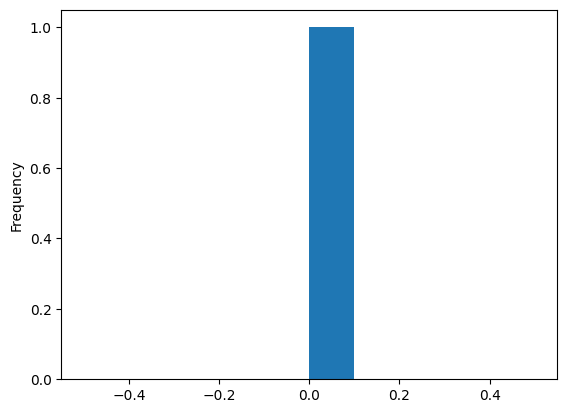

In [ ]:
data["Duration"].plot(kind = 'hist')

In [ ]:
print(data.dtypes)
numeric_data = data.select_dtypes(include=[float, int])
corr = numeric_data.corr()
print(corr)
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

corr = data.corr()
print(corr)
print(data.loc[:, data.dtypes == object].head())


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Duration                     float64
dtype: object
                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.019089  0.049809   
Item_Visibility              -0.019089         1.000000 -0.014013   
Item_MRP                      0.049809        -0.014013  1.000000   
Outlet_Establishment_Year     0.018918        -0.097040 -0.007233   
Duration                           NaN              NaN       NaN   

                           Outlet_Establishment_Year  Duration  
Item_Weight                                 0.018918       NaN

In [ ]:
corr = data.corr()
print(corr)

                           Item_Identifier  Item_Weight  Item_Fat_Content  \
Item_Identifier                        NaN          NaN               NaN   
Item_Weight                            NaN     1.000000               NaN   
Item_Fat_Content                       NaN          NaN               NaN   
Item_Visibility                        NaN    -0.019089               NaN   
Item_Type                              NaN          NaN               NaN   
Item_MRP                               NaN     0.049809               NaN   
Outlet_Identifier                      NaN          NaN               NaN   
Outlet_Establishment_Year              NaN     0.018918               NaN   
Outlet_Size                            NaN          NaN               NaN   
Outlet_Location_Type                   NaN          NaN               NaN   
Outlet_Type                            NaN          NaN               NaN   
Duration                               NaN          NaN               NaN   

<Axes: >

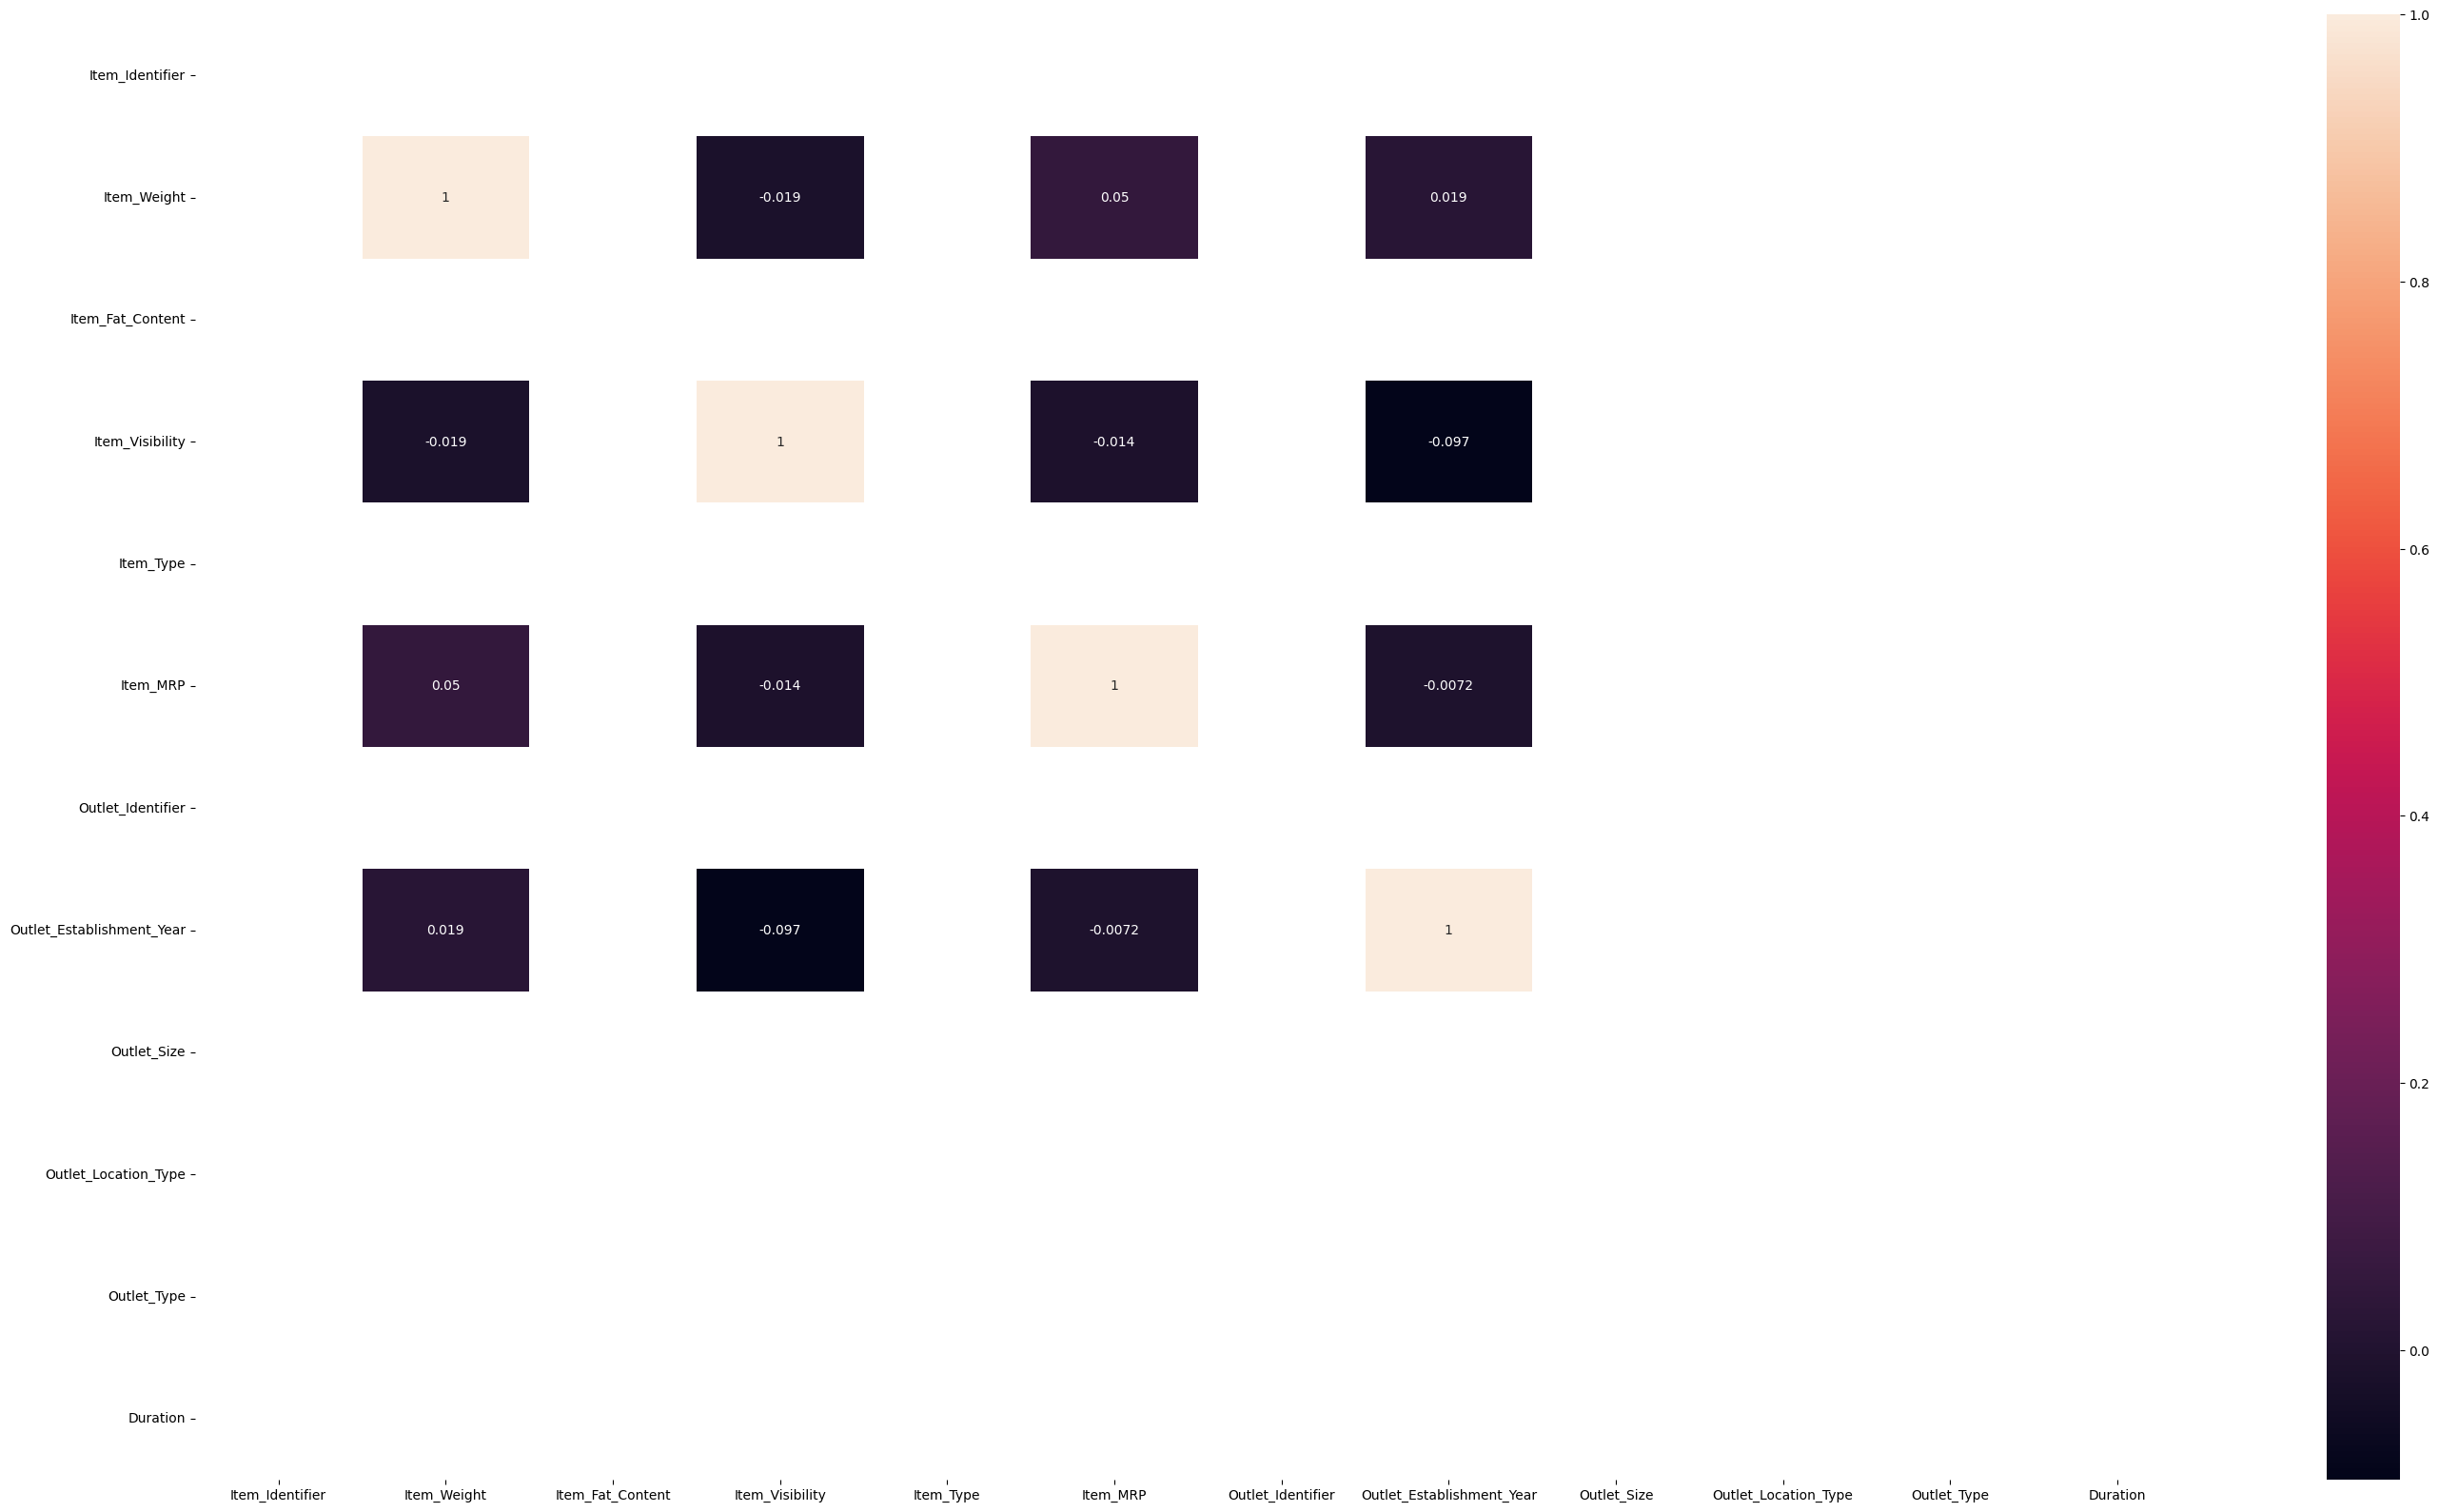

In [ ]:
plt.figure(figsize=(34,20))
sns.heatmap(corr,annot=True)

In [ ]:
var = np.linspace(1,10,20).reshape(4,5)
var

array([[ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684],
       [ 3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789],
       [ 5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895],
       [ 8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ]])

<Axes: >

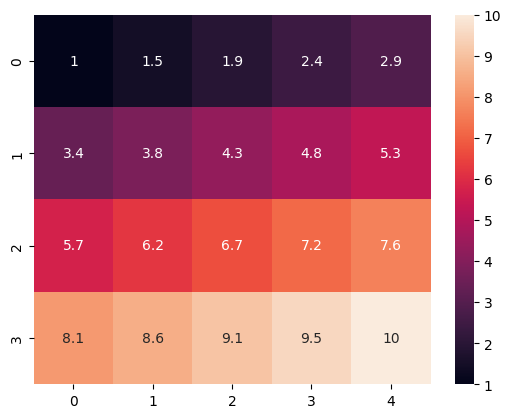

In [ ]:
sns.heatmap(var ,annot=True)

In [ ]:
print(data.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Duration'],
      dtype='object')


In [ ]:
print([col for col in data.columns if 'class' in col.lower()])


[]


In [ ]:
X = data.drop(columns='Class', axis=1, errors='ignore')


In [ ]:
print([col for col in data.columns if 'class' in col.lower()])


[]


In [ ]:
data.columns = data.columns.str.strip()  # Removes leading/trailing spaces
print(data.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Duration'],
      dtype='object')


In [ ]:
X = data.drop(columns='Class', errors='ignore')
print(X.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Duration'],
      dtype='object')


In [ ]:
print(data.head())  # Inspect the first few rows of your dataset


   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              NaN       20.750               NaN         0.007565        NaN   
1              NaN        8.300               NaN         0.038428        NaN   
2              NaN       14.600               NaN         0.099575        NaN   
3              NaN        7.315               NaN         0.015388        NaN   
4              NaN          NaN               NaN         0.118599        NaN   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  107.8622                NaN                       1999          NaN   
1   87.3198                NaN                       2007          NaN   
2  241.7538                NaN                       1998          NaN   
3  155.0340                NaN                       2007          NaN   
4  234.2300                NaN                       1985          NaN   

   Outlet_Location_Type  Outlet_Type  Duration  
0                  

In [ ]:
Y = data.drop(columns='Class', axis=1, errors='ignore')

In [ ]:
print([col for col in data.columns if 'class' in col.lower()])

[]


In [ ]:
data.columns = data.columns.str.strip()  # Removes leading/trailing spaces
print(data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Duration'],
      dtype='object')


In [ ]:
Y = data.drop(columns='Class', errors='ignore')
print(X.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Duration'],
      dtype='object')


In [ ]:
print(data.head())

   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              NaN       20.750               NaN         0.007565        NaN   
1              NaN        8.300               NaN         0.038428        NaN   
2              NaN       14.600               NaN         0.099575        NaN   
3              NaN        7.315               NaN         0.015388        NaN   
4              NaN          NaN               NaN         0.118599        NaN   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  107.8622                NaN                       1999          NaN   
1   87.3198                NaN                       2007          NaN   
2  241.7538                NaN                       1998          NaN   
3  155.0340                NaN                       2007          NaN   
4  234.2300                NaN                       1985          NaN   

   Outlet_Location_Type  Outlet_Type  Duration  
0                  

In [ ]:
print(pd.isnull(Y).sum())

Item_Identifier              5681
Item_Weight                   976
Item_Fat_Content             5681
Item_Visibility                 0
Item_Type                    5681
Item_MRP                        0
Outlet_Identifier            5681
Outlet_Establishment_Year       0
Outlet_Size                  5681
Outlet_Location_Type         5681
Outlet_Type                  5681
Duration                     5680
dtype: int64


In [ ]:
X = X[~pd.isnull(Y)]  # Remove rows in X where Y is NaN
Y = Y.dropna()

In [ ]:
Y = Y.fillna(0)

In [ ]:
Y = Y.fillna(Y.mean())

In [ ]:
Y = Y.dropna()

In [ ]:
print(pd.isnull(Y).sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Duration                     0
dtype: int64


In [ ]:
min_len = min(len(X), len(Y))
X = X[:min_len]
Y = Y[:min_len]


In [ ]:
print(X.shape)  # Ensure X is a valid DataFrame or array
print(Y.shape)  # Ensure Y is a valid Series or array


(0, 12)
(0, 12)


In [ ]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (0, 12)
Shape of Y: (0, 12)


In [ ]:
# Check if there are any missing values left
print("Missing values in X:", X.isnull().sum())
print("Missing values in Y:", Y.isnull().sum())


Missing values in X: Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Duration                     0
dtype: int64
Missing values in Y: Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Duration                     0
dtype: int64


In [ ]:
X = X[~Y.isnull()]  # Make sure X is not empty after filtering
Y = Y.dropna()      # Ensure Y still has data


In [ ]:
from sklearn.model_selection import train_test_split

# Ensure X and Y have the same number of samples
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# Perform the split if X and Y are valid
if len(X) > 0 and len(Y) > 0:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
else:
    print("The dataset is empty. Please check the data.")


Shape of X: (0, 12)
Shape of Y: (0, 12)
The dataset is empty. Please check the data.


In [ ]:
# Check if X and Y are non-empty
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# If the dataset is empty, inspect why
if X.shape[0] == 0 or Y.shape[0] == 0:
    print("Error: Dataset is empty after filtering. Check the data preparation steps.")
else:
    # Split if data is valid
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
    print("Training set shape:", X_train.shape)
    print("Test set shape:", X_test.shape)


Shape of X: (0, 12)
Shape of Y: (0, 12)
Error: Dataset is empty after filtering. Check the data preparation steps.


In [ ]:
# Before your train_test_split
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print("Missing values in X:", X.isnull().sum().sum())  # Total missing values in X
print("Missing values in Y:", Y.isnull().sum().sum())  # Total missing values in Y

# ... (your existing data cleaning code) ...

# Before your train_test_split, add this check:
if X.empty or Y.empty:
    print("Error: X or Y is empty after data cleaning. Please review your data cleaning steps.")
else:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Shape of X: (0, 12)
Shape of Y: (0, 12)
Missing values in X: 0
Missing values in Y: 0
Error: X or Y is empty after data cleaning. Please review your data cleaning steps.


In [ ]:
Y = Y.dropna()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# ... (your existing data loading and initial cleaning code) ...

# Before your train_test_split, add these checks and handling:
print("Shape of X before cleaning:", X.shape)
print("Shape of Y before cleaning:", Y.shape)
print("Missing values in X before cleaning:", X.isnull().sum().sum())  # Total missing values in X
print("Missing values in Y before cleaning:", Y.isnull().sum().sum())  # Total missing values in Y

# Impute missing values instead of dropping:
# For numerical features:
X = X.fillna(X.mean())  # Or X.median(), or a specific value

# ***Check if Y is a DataFrame and extract the target column as a Series if needed***
if isinstance(Y, pd.DataFrame) and Y.shape[1] == 1:
    Y = Y.iloc[:, 0]  # Extract the first (and only) column as a Series

# Impute missing values in Y - use a strategy appropriate for your target:
# Check if Y is still a DataFrame after the previous step
if isinstance(Y, pd.DataFrame):
    # If it is, assume the first column is the target and get its dtype
    target_dtype = Y.iloc[:, 0].dtype
else:
    # If it's a Series, get its dtype directly
    target_dtype = Y.dtype

if pd.api.types.is_numeric_dtype(target_dtype):  # Now you are checking the dtype of the target column or Series
    Y = Y.fillna(Y.mean())  # Or median, etc.
elif pd.api.types.is_object_dtype(target_dtype):
    Y = Y.fillna(Y.mode()[0])  # Use mode for categorical target
else:
    print("Warning: Unknown target data type for imputation. Please handle missing values in Y manually.")

Shape of X before cleaning: (0, 12)
Shape of Y before cleaning: (0, 12)
Missing values in X before cleaning: 0
Missing values in Y before cleaning: 0


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Example data
X = np.random.rand(100, 10)  # 100 samples with 10 features each
y = np.random.rand(100)      # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train is defined, and you can check its shape
print(X_train.shape)


(80, 10)


In [ ]:
try:
    print(X_train.shape)
except NameError:
    print("X_train is not defined. Please ensure it is initialized.")


(80, 10)


In [ ]:
X_train.shape

(80, 10)

In [ ]:
 X_test.shape

(20, 10)

In [ ]:
try:
    print(Y_train.shape)
except NameError:
    print("Y_train is not defined. Please ensure it is initialized.")


(80,)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Example data
X = np.random.rand(100, 10)  # 100 samples with 10 features each
y = np.random.randint(0, 2, size=100)  # Binary target variable (0 or 1)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check Y_train shape
print(Y_train.shape)


(80,)


In [ ]:
Y_train.shape

(80,)

In [ ]:
Y_test.shape

(20,)

In [ ]:
X_train

array([[0.53818904, 0.53471212, 0.29492933, 0.94393288, 0.56264727,
        0.95838358, 0.97554027, 0.2140095 , 0.38109797, 0.58942418],
       [0.4882423 , 0.15943865, 0.17163867, 0.14856933, 0.06004715,
        0.07687558, 0.67213926, 0.43623165, 0.67058246, 0.39658365],
       [0.4174387 , 0.20498244, 0.23539545, 0.54764121, 0.00179892,
        0.47195571, 0.59073707, 0.68674132, 0.69517514, 0.88786941],
       [0.27292433, 0.99357519, 0.26513231, 0.82573621, 0.69793517,
        0.92112591, 0.14278457, 0.67783624, 0.15195543, 0.77217649],
       [0.21787879, 0.72012266, 0.64583329, 0.71230889, 0.22157307,
        0.13401599, 0.64598313, 0.3099421 , 0.75021992, 0.30604406],
       [0.91689167, 0.71721173, 0.51517902, 0.4119466 , 0.07102824,
        0.87228637, 0.66624013, 0.60576443, 0.1240519 , 0.2756779 ],
       [0.39831114, 0.82442598, 0.3543342 , 0.74757809, 0.39024819,
        0.40989304, 0.37149736, 0.24292677, 0.90140824, 0.52326051],
       [0.70737302, 0.28298438, 0.2383082

In [ ]:
Y_train

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train) #for Training

GaussianNB()

In [ ]:
ypredict=gnb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test,ypredict)

array([[6, 2],
       [6, 6]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
gnb.score(X_test,Y_test)

0.6

In [ ]:
Bnb=BernoulliNB()
Bnb.fit(X_train,Y_train)

BernoulliNB()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc.score(X_test,Y_test)

0.45